   edge_index0  edge_index1      pred   gr
0          927         1900  0.987534  1.0
1         1658         2044  0.965989  1.0
2          218          490  0.282045  1.0
3          223          702  1.000000  1.0
4          575         1241  0.067818  1.0
best_accuracy: 0.8458498023715415, best_threshold: 0.19191919191919193


20it [00:00, 20.35it/s]
20it [00:00, 30.29it/s]


{'mrr_hit0.1': tensor(0.7115), 'mrr_hit0.2': tensor(0.8775), 'mrr_hit0.3': tensor(0.9328), 'mrr_hit0.5': tensor(0.9407), 'mrr_hit1.0': tensor(1.)}
{'AUC': 0.903, 'AP': 0.8971}
{'mrr_hit0.1': tensor(0.0040), 'mrr_hit0.2': tensor(0.0040), 'mrr_hit0.3': tensor(0.0040), 'mrr_hit0.5': tensor(0.0356), 'mrr_hit1.0': tensor(1.)}


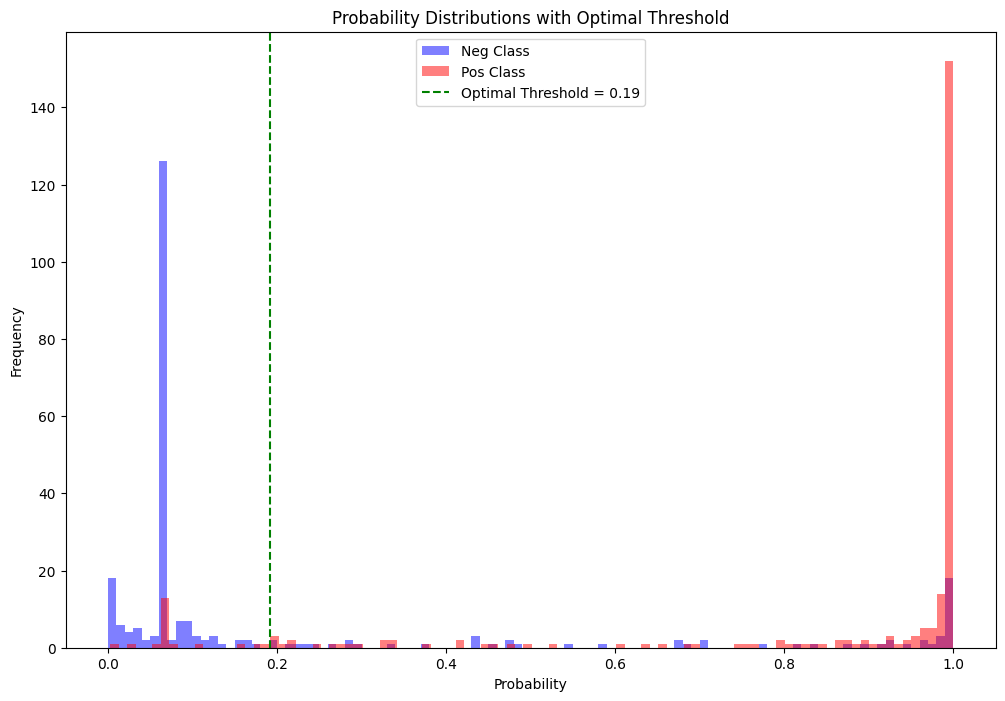

<Figure size 640x480 with 0 Axes>

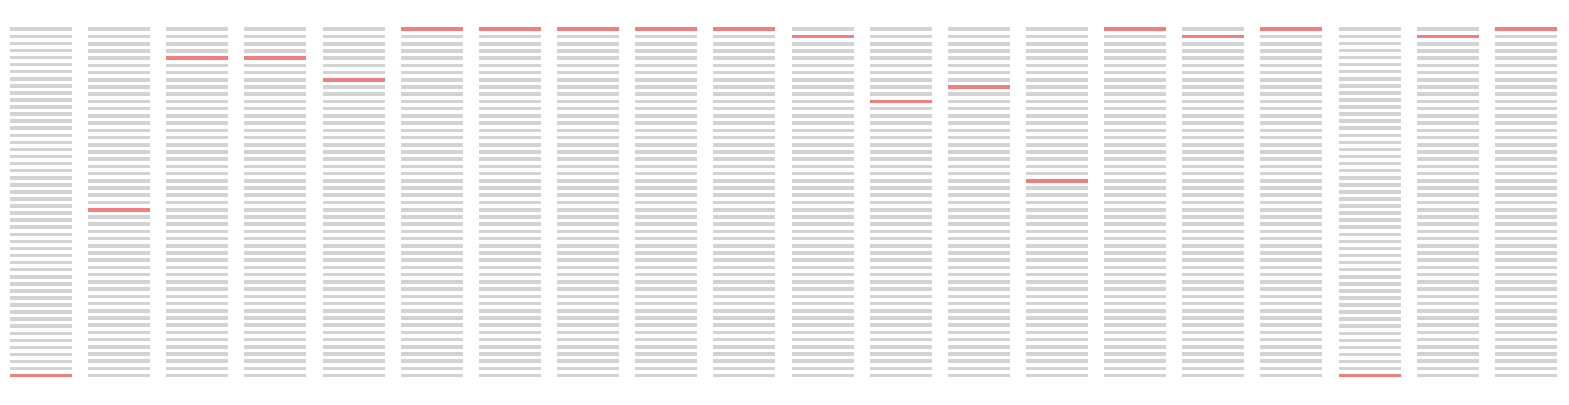

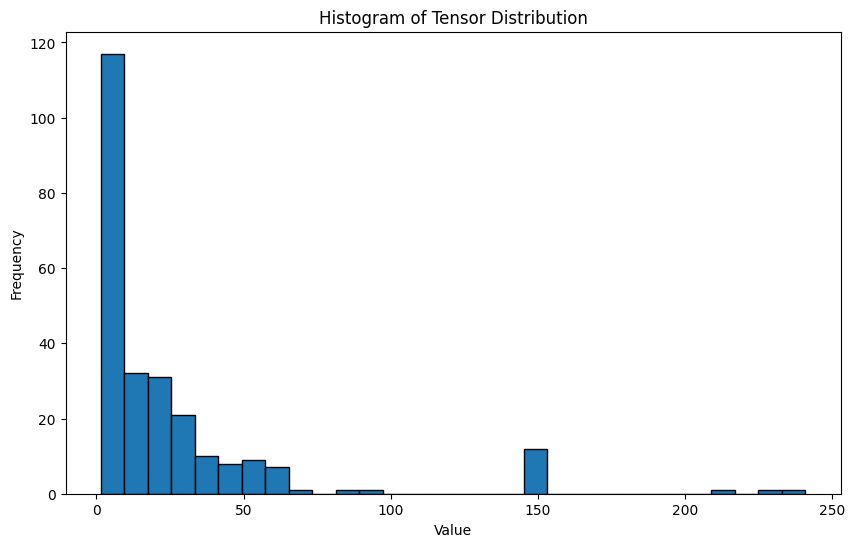

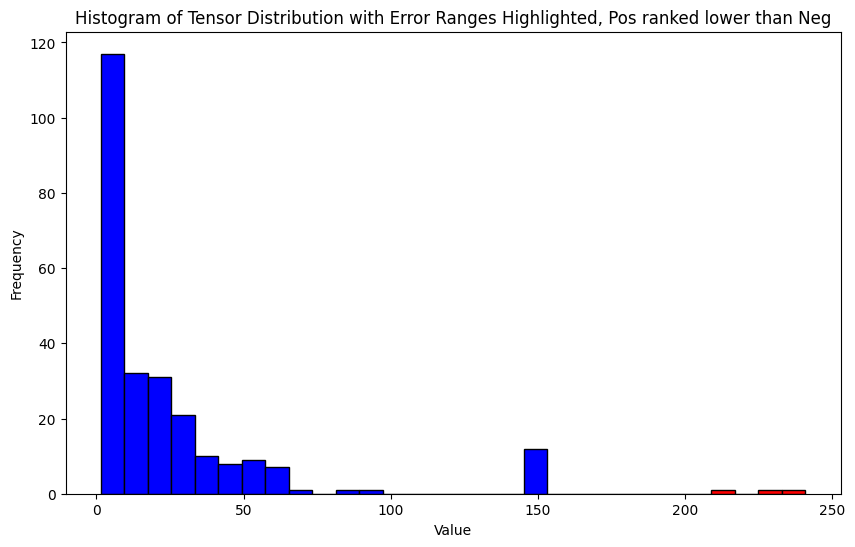

<Figure size 640x480 with 0 Axes>

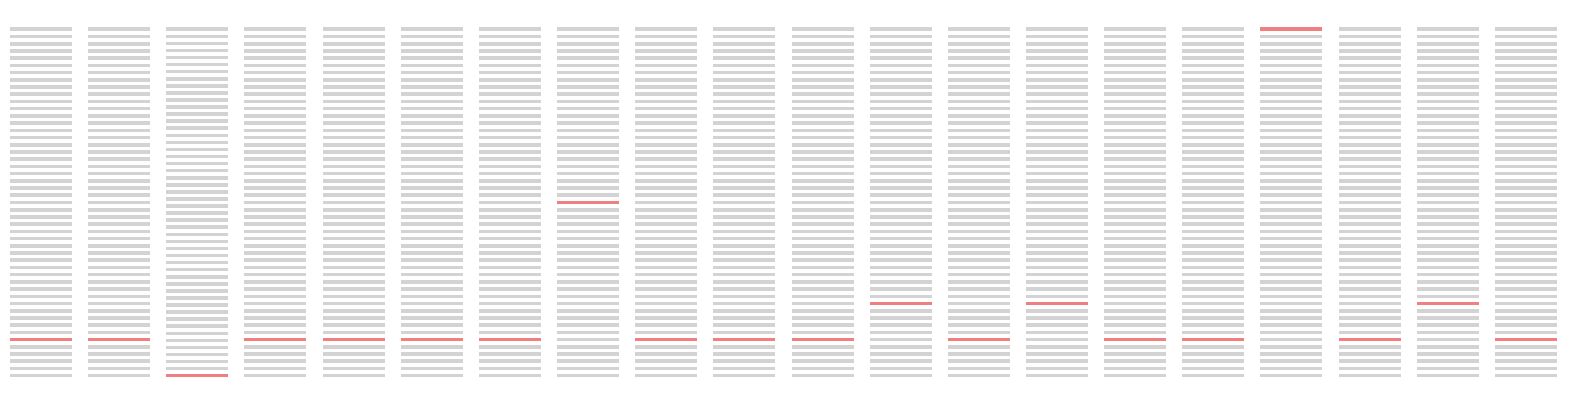

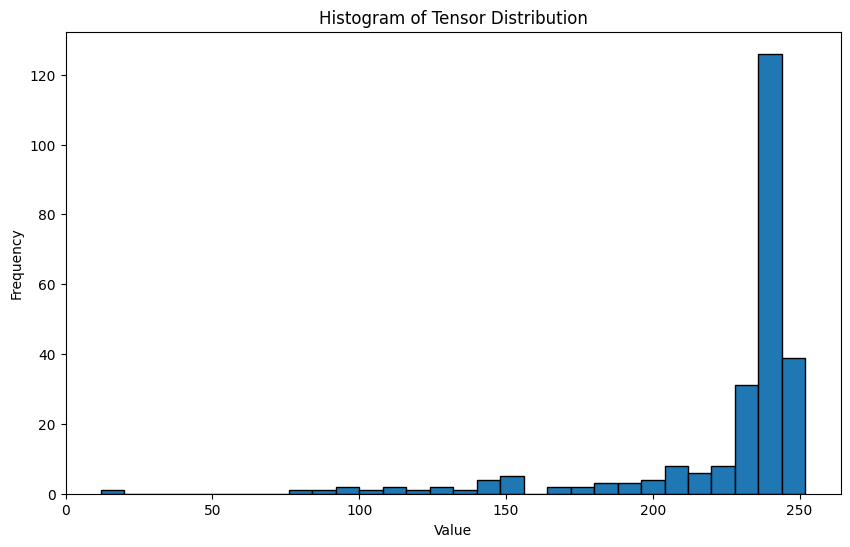

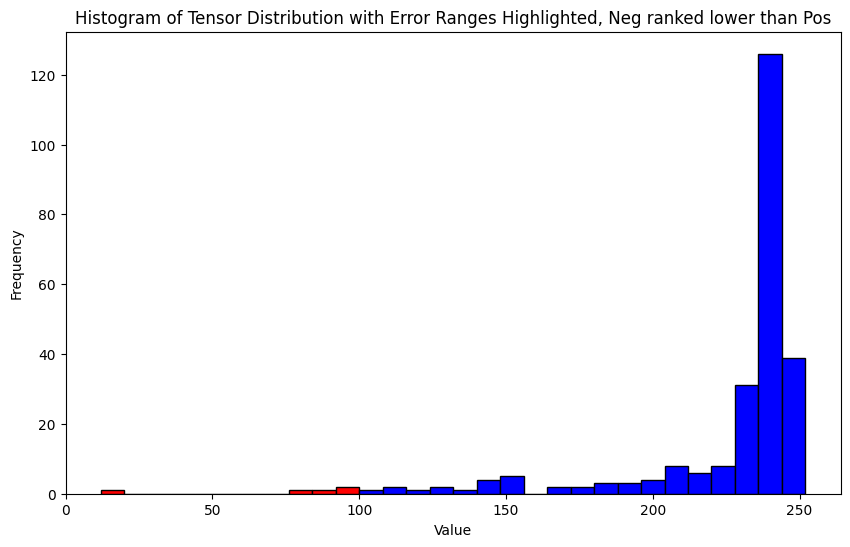

In [10]:
import pandas as pd
from ogb.linkproppred import PygLinkPropPredDataset, Evaluator
import torch 
from visual import find_optimal_threshold, get_metric_invariant
from matplotlib import pyplot as plt

def load_csv(file_path):
    """
    Load a CSV file into a pandas DataFrame.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the data from the CSV file.
    """
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: There was an issue parsing the file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
FILE_PATH = '/hkfs/work/workspace/scratch/cc7738-benchmark_tag/educational_demo/'
file_path = FILE_PATH + 'err_ncnc_llama/llama-cora-origin_dot_AUC_0.903_MRR_0.228.csv'
data = load_csv(file_path)

if data is not None:
    print(data.head())  # Print the first few rows of the DataFrame
    
import matplotlib.pyplot as plt

# evaluator = Evaluator(name='ogbl-collab')
evaluator_hit = Evaluator(name='ogbl-collab')
evaluator_mrr = Evaluator(name='ogbl-citation2')

pred = data['pred'].tolist()
gr = data['gr'].tolist()
source = data['edge_index0'].tolist()
target = data['edge_index1'].tolist()

pos_mask = data[data['gr'] == 1.0]
pos_index = pos_mask[['edge_index0', 'edge_index1']]

neg_mask = data[data['gr'] == 0.0]
neg_index = neg_mask[['edge_index0', 'edge_index1']]

P2 = neg_mask['pred'].to_numpy()
P1 = pos_mask['pred'].to_numpy()

plt.figure(figsize=(12, 8))

# Plot distributions of probabilities
plt.hist(P2, bins=100, alpha=0.5, color='blue', label='Neg Class')
plt.hist(P1, bins=100, alpha=0.5, color='red', label='Pos Class')
best_threshold, best_accuracy= find_optimal_threshold(P1, P2)

plt.axvline(best_threshold, color='green', linestyle='--', label=f'Optimal Threshold = {best_threshold:.2f}')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.legend()
plt.title('Probability Distributions with Optimal Threshold')
plt.savefig('optimal_threshold.png')
print(f'best_accuracy: {best_accuracy}, best_threshold: {best_threshold}')

k_list  = [0.1, 0.2, 0.3, 0.5, 1]
pos_index = torch.tensor(pos_index.to_numpy())
neg_index = torch.tensor(neg_index.to_numpy())
P1 = torch.tensor(P1)
P2 = torch.tensor(P2)
mrr_pos2neg, mrr_neg2pos, result_auc_test, pos_edge_index_err, pos_rank_err, neg_edge_index_err, neg_rank_err = get_metric_invariant(P1, pos_index, P2, neg_index, k_list)

print(mrr_pos2neg)
print(result_auc_test)
print(mrr_neg2pos)


In [11]:
import os
import sys

# Assuming your target directory is one level up from the current working directory
notebook_dir = os.getcwd()  
target_dir = os.path.abspath(os.path.join(notebook_dir, '..'))

sys.path.insert(0, target_dir)
from core.data_utils.load import load_data_lp
from core.graphgps.utility.utils import init_cfg_test

cfg = init_cfg_test()

In [13]:
splits, text, data = load_data_lp[cfg.data.name](cfg.data)

not loaded 0 papers.
create graph: 0.11952567100524902
[2485]
original num of nodes: 2485
num of nodes after lcc: 2485
num of edges after lcc: 10138
num of texts in dataset: 2485


## What Pos is predicted as Neg? Type II.

In [15]:
for row in pos_edge_index_err:
    print(f'source: {text[row[0]]}, \n target: {text[row[1]]}')

source: Title: An Incremental Interactive Algorithm for Regular Grammar Inference  
Abstract: We present provably correct interactive algorithms for learning regular grammars from positive examples and membership queries. A structurally complete set of strings from a language L(G) corresponding to a target regular grammar G implicitly specifies a lattice of finite state automata (FSA) which contains a FSA M G corresponding to G. The lattice is compactly represented as a version-space and M G is identified by searching the version-space using membership queries. We explore the problem of regular grammar inference in a setting where positive examples are provided intermittently. We provide an incremental version of the algorithm along with a set of sufficient conditions for its convergence., 
 target: Title: Toward Learning Systems That Integrate Different Strategies and Representations TR93-22  
Abstract: Temporal difference (TD) methods constitute a class of methods for learning predic

In [16]:
from IPython.display import display, Markdown


for row in pos_edge_index_err:
    src = text[row[0]]
    tgt = text[row[1]]
    display(Markdown(f"**Source:** {src}  \n**Target:** {tgt}"))

**Source:** Title: An Incremental Interactive Algorithm for Regular Grammar Inference  
Abstract: We present provably correct interactive algorithms for learning regular grammars from positive examples and membership queries. A structurally complete set of strings from a language L(G) corresponding to a target regular grammar G implicitly specifies a lattice of finite state automata (FSA) which contains a FSA M G corresponding to G. The lattice is compactly represented as a version-space and M G is identified by searching the version-space using membership queries. We explore the problem of regular grammar inference in a setting where positive examples are provided intermittently. We provide an incremental version of the algorithm along with a set of sufficient conditions for its convergence.  
**Target:** Title: Toward Learning Systems That Integrate Different Strategies and Representations TR93-22  
Abstract: Temporal difference (TD) methods constitute a class of methods for learning predictions in multi-step prediction problems, parameterized by a recency factor . Currently the most important application of these methods is to temporal credit assignment in reinforcement learning. Well known reinforcement learning algorithms, such as AHC or Q-learning, may be viewed as instances of TD learning. This paper examines the issues of the efficient and general implementation of TD() for arbitrary , for use with reinforcement learning algorithms optimizing the discounted sum of rewards. The traditional approach, based on eligibility traces, is argued to suffer from both inefficiency and lack of generality. The TTD (Truncated Temporal Differences) procedure is proposed as an alternative, that indeed only approximates TD(), but requires very little computation per action and can be used with arbitrary function representation methods. The idea from which it is derived is fairly simple and not new, but probably unexplored so far. Encouraging experimental results are presented, suggesting that using &gt; 0 with the TTD procedure allows one to obtain a significant learning speedup at essentially the same cost as usual TD(0) learning.

**Source:** Title: Figure 8: time complexity of unit parallelism measured on MANNA theoretical prediction #nodes N time
Abstract: Our experience showed us that exibility in expressing a parallel algorithm for simulating neural networks is desirable even if it is not possible then to obtain the most efficient solution for any single training algorithm. We believe that the advantages of a clear and easy to understand program predominates the disadvantages of approaches allowing only for a specific machine or neural network algorithm. We currently investigate if other neural network models are worth while being parallelized, and how the resulting parallel algorithms can be composed of a few common basic building blocks and the logarithmic tree as efficient communication structure. 1 2 4 8 2 500 connections 40 000 connections [1] D. Ackley, G. Hinton, T. Sejnowski: A Learning Algorithm for Boltzmann Machines, Cognitive Science 9, pp. 147-169, 1985 [2] B. M. Forrest et al.: Implementing Neural Network Models on Parallel Computers, The computer Journal, vol. 30, no. 5, 1987 [3] W. Giloi: Latency Hiding in Message Passing Architectures, International Parallel Processing Symposium, April 1994, Cancun, Mexico, IEEE Computer Society Press [4] T. Nordstrm, B. Svensson: Using And Designing Massively Parallel Computers for Artificial Neural Networks, Journal Of Parallel And Distributed Computing, vol. 14, pp. 260-285, 1992 [5] A. Kramer, A. Vincentelli: Efficient parallel learning algorithms for neural networks, Advances in Neural Information Processing Systems I, D. Touretzky (ed.), pp. 40-48, 1989 [6] T. Kohonen: Self-Organization and Associative Memory, Springer-Verlag, Berlin, 1988 [7] D. A. Pomerleau, G. L. Gusciora, D. L. Touretzky, H. T. Kung: Neural Network Simulation at Warp Speed: How We Got 17 Million Connections Per Second, IEEE Intern. Conf. Neural Networks, July 1988 [8] A. Rbel: Dynamic selection of training patterns for neural networks: A new method to control the generalization, Technical Report 92-39, Technical University of Berlin, 1993 [9] D. E. Rumelhart, D. E. Hinton, R. J. Williams: Learning internal representations by error propagation, Rumelhart & McClelland (eds.), Parallel Distributed Processing: Explorations in the Microstructure of Cognition, vol. I, pp. 318-362, Bradford Books/MIT Press, Cambridge, MA, 1986 [10] W. Schiffmann, M. Joost, R. Werner: Comparison of optimized backpropagation algorithms, Proc. of the European Symposium on Artificial Neural Networks, ESANN '93, Brussels, pp. 97-104, 1993 [11] J. Schmidhuber: Accelerated Learning in BackPropagation Nets, Connectionism in perspective, Elsevier Science Publishers B.V. (North-Holland), pp 439-445,1989 [12] M. Taylor, P. Lisboa (eds.): Techniques and Applications of Neural Networks, Ellis Horwood, 1993 [13] M. Witbrock, M. Zagha: An implementation of backpropagation learning on GF11, a large SIMD parallel computer, Parallel Computing, vol. 14, pp. 329-346, 1990 [14] X. Zhang, M. Mckenna, J. P. Mesirov, D. L. Waltz: The backpropagation algorithm on grid and hypercube architectures, Parallel Computing, vol. 14, pp. 317-327, 1990   
**Target:** Title: Cholinergic suppression of transmission may allow combined associative memory function and self-organization in the neocortex.  
Abstract: Selective suppression of transmission at feedback synapses during learning is proposed as a mechanism for combining associative feedback with self-organization of feedforward synapses. Experimental data demonstrates cholinergic suppression of synaptic transmission in layer I (feedback synapses), and a lack of suppression in layer IV (feed-forward synapses). A network with this feature uses local rules to learn mappings which are not linearly separable. During learning, sensory stimuli and desired response are simultaneously presented as input. Feedforward connections form self-organized representations of input, while suppressed feedback connections learn the transpose of feedfor-ward connectivity. During recall, suppression is removed, sensory input activates the self-organized representation, and activity generates the learned response.

## Analysis for Error I
https://24timezones.com/difference/frankfurt_ger/new_delhi?dt=2024-07-31T830pm 
1. Such citation indeed exists, however, it appears in a historical section.
| ![Example Image](intro.png) |![Example Image](ref.png) |

## Analysis for Error II 
1. textual features are quite noisy. 

**Target:**

**Title:** Cholinergic Suppression of Transmission May Allow Combined Associative Memory Function and Self-Organization in the Neocortex

**Abstract:** Selective suppression of transmission at feedback synapses during learning is proposed as a mechanism for combining associative feedback with self-organization of feedforward synapses. Experimental data demonstrates cholinergic suppression of synaptic transmission in layer I (feedback synapses), and a lack of suppression in layer IV (feed-forward synapses). A network with this feature uses local rules to learn mappings which are not linearly separable. During learning, sensory stimuli and desired responses are simultaneously presented as input. Feedforward connections form self-organized representations of input, while suppressed feedback connections learn the transpose of feedforward connectivity. During recall, suppression is removed, sensory input activates the self-organized representation, and activity generates the learned response.

### No idea what the hell is this? Title is the Figure description and abstract is followed by the reference?

**Source:**

**Title:** Figure 8: Time Complexity of Unit Parallelism Measured on MANNA Theoretical Prediction #nodes N Time

**Abstract:** Our experience showed us that flexibility in expressing a parallel algorithm for simulating neural networks is desirable even if it is not possible then to obtain the most efficient solution for any single training algorithm. We believe that the advantages of a clear and easy-to-understand program predominate the disadvantages of approaches allowing only for a specific machine or neural network algorithm. We currently investigate if other neural network models are worthwhile being parallelized, and how the resulting parallel algorithms can be composed of a few common basic building blocks and the logarithmic tree as an efficient communication structure.

**References:**
1. D. Ackley, G. Hinton, T. Sejnowski: *A Learning Algorithm for Boltzmann Machines*, Cognitive Science 9, pp. 147-169, 1985
2. B. M. Forrest et al.: *Implementing Neural Network Models on Parallel Computers*, The Computer Journal, vol. 30, no. 5, 1987
3. W. Giloi: *Latency Hiding in Message Passing Architectures*, International Parallel Processing Symposium, April 1994, Cancun, Mexico, IEEE Computer Society Press
4. T. Nordström, B. Svensson: *Using And Designing Massively Parallel Computers for Artificial Neural Networks*, Journal Of Parallel And Distributed Computing, vol. 14, pp. 260-285, 1992
5. A. Kramer, A. Vincentelli: *Efficient Parallel Learning Algorithms for Neural Networks*, Advances in Neural Information Processing Systems I, D. Touretzky (ed.), pp. 40-48, 1989
6. T. Kohonen: *Self-Organization and Associative Memory*, Springer-Verlag, Berlin, 1988
7. D. A. Pomerleau, G. L. Gusciora, D. L. Touretzky, H. T. Kung: *Neural Network Simulation at Warp Speed: How We Got 17 Million Connections Per Second*, IEEE Intern. Conf. Neural Networks, July 1988
8. A. Rübel: *Dynamic Selection of Training Patterns for Neural Networks: A New Method to Control the Generalization*, Technical Report 92-39, Technical University of Berlin, 1993
9. D. E. Rumelhart, D. E. Hinton, R. J. Williams: *Learning Internal Representations by Error Propagation*, Rumelhart & McClelland (eds.), Parallel Distributed Processing: Explorations in the Microstructure of Cognition, vol. I, pp. 318-362, Bradford Books/MIT Press, Cambridge, MA, 1986
10. W. Schiffmann, M. Joost, R. Werner: *Comparison of Optimized Backpropagation Algorithms*, Proc. of the European Symposium on Artificial Neural Networks, ESANN '93, Brussels, pp. 97-104, 1993
11. J. Schmidhuber: *Accelerated Learning in BackPropagation Nets*, Connectionism in Perspective, Elsevier Science Publishers B.V. (North-Holland), pp 439-445, 1989
12. M. Taylor, P. Lisboa (eds.): *Techniques and Applications of Neural Networks*, Ellis Horwood, 1993
13. M. Witbrock, M. Zagha: *An Implementation of Backpropagation Learning on GF11, a Large SIMD Parallel Computer*, Parallel Computing, vol. 14, pp. 329-346, 1990
14. X. Zhang, M. McKenna, J. P. Mesirov, D. L. Waltz: *The Backpropagation Algorithm on Grid and Hypercube Architectures*, Parallel Computing, vol. 14, pp. 317-327, 1990

In [18]:
from IPython.display import display, Markdown

for row in neg_edge_index_err:
    src = text[row[0]]
    tgt = text[row[1]]
    display(Markdown(f"**Source:** {src}  \n**Target:** {tgt}"))

**Source:** Title: The megaprior heuristic for discovering protein sequence patterns  
Abstract: Several computer algorithms for discovering patterns in groups of protein sequences are in use that are based on fitting the parameters of a statistical model to a group of related sequences. These include hidden Markov model (HMM) algorithms for multiple sequence alignment, and the MEME and Gibbs sampler algorithms for discovering motifs. These algorithms are sometimes prone to producing models that are incorrect because two or more patterns have been combined. The statistical model produced in this situation is a convex combination (weighted average) of two or more different models. This paper presents a solution to the problem of convex combinations in the form of a heuristic based on using extremely low variance Dirichlet mixture priors as part of the statistical model. This heuristic, which we call the megaprior heuristic, increases the strength (i.e., decreases the variance) of the prior in proportion to the size of the sequence dataset. This causes each column in the final model to strongly resemble the mean of a single component of the prior, regardless of the size of the dataset. We describe the cause of the convex combination problem, analyze it mathematically, motivate and describe the implementation of the megaprior heuristic, and show how it can effectively eliminate the problem of convex combinations in protein sequence pattern discovery.   
**Target:** Title: 4 Implementing Application Specific Routines  Genetic algorithms in search, optimization, and machine learning. Reading, MA: Addison-Wesley.  
Abstract: To implement a specific application, you should only have to change the file app.c. Section 2 describes the routines in app.c in detail. If you use additional variables for your specific problem, the easiest method of making them available to other program units is to declare them in sga.h and external.h. However, take care that you do not redeclare existing variables. Two example applications files are included in the SGA-C distribution. The file app1.c performs the simple example problem included with the Pascal version; finding the maximum of x 10 , where x is an integer interpretation of a chromosome. A slightly more complex application is include in app2.c. This application illustrates two features that have been added to SGA-C. The first of these is the ithruj2int function, which converts bits i through j in a chromosome to an integer. The second new feature is the utility pointer that is associated with each population member. The example application interprets each chromosome as a set of concatenated integers in binary form. The lengths of these integer fields is determined by the user-specified value of field size, which is read in by the function app data(). The field size must be less than the smallest of the chromosome length and the length of an unsigned integer. An integer array for storing the interpreted form of each chromosome is dynamically allocated and assigned to the chromosome's utility pointer in app malloc(). The ithruj2int routine (see utility.c) is used to translate each chromosome into its associated vector. The fitness for each chromosome is simply the sum of the squares of these integers. This example application will function for any chromosome length. SGA-C is intended to be a simple program for first-time GA experimentation. It is not intended to be definitive in terms of its efficiency or the grace of its implementation. The authors are interested in the comments, criticisms, and bug reports from SGA-C users, so that the code can be refined for easier use in subsequent versions. Please email your comments to rob@galab2.mh.ua.edu, or write to TCGA: The authors gratefully acknowledge support provided by NASA under Grant NGT-50224 and support provided by the National Science Foundation under Grant CTS-8451610. We also thank Hillol Kargupta for donating his tournament selection implementation. Booker, L. B. (1982). Intelligent behavior as an adaptation to the task environment (Doctoral dissertation, Technical Report No. 243. Ann Arbor: University of Michigan, Logic of Computers Group). Dissertations Abstracts International, 43(2), 469B. (University Microfilms No. 8214966) 

**Source:** Title: MEDIATING INSTRUMENTAL VARIABLES  
Abstract: A method is described which reduces the hypotheses space with an efficient and easily interpretable reduction criteria called a - reduction. A learning algorithm is described based on a - reduction and analyzed by using probability approximate correct learning results. The results are obtained by reducing a rule set to an equivalent set of kDNF formulas. The goal of the learning algorithm is to induce a compact rule set describing the basic dependencies within a set of data. The reduction is based on criterion which is very exible and gives a semantic interpretation of the rules which fulfill the criteria. Comparison with syntactical hypotheses reduction show that the a reduction improves search and has a smaller probability of missclassification.   
**Target:** Title: Hierarchical Reinforcement Learning with the MAXQ Value Function Decomposition  
Abstract: This paper describes the MAXQ method for hierarchical reinforcement learning based on a hierarchical decomposition of the value function and derives conditions under which the MAXQ decomposition can represent the optimal value function. We show that for certain execution models, the MAXQ decomposition will produce better policies than Feudal Q learning.

**Source:** Title: "Linear Dependencies Represented by Chain Graphs," "Graphical Modelling With MIM," Manual. "Identifying Independence in Bayesian
Abstract: 8] Dori, D. and Tarsi, M., "A Simple Algorithm to Construct a Consistent Extension of a Partially Oriented Graph," Computer Science Department, Tel-Aviv University. Also Technical Report R-185, UCLA, Cognitive Systems Laboratory, October 1992. [14] Pearl, J. and Wermuth, N., "When Can Association Graphs Admit a Causal Interpretation?," UCLA, Cognitive Systems Laboratory, Technical Report R-183-L, November 1992. [17] Verma, T.S. and Pearl, J., "Deciding Morality of Graphs is NP-complete," Technical Report R-188, UCLA, Cognitive Systems Laboratory, October 1992.   
**Target:** Title: Causal inference, path analysis, and recursive struc-tural equations models. In C. Clogg, editor, Sociological Methodology,
Abstract: Lipid Research Clinic Program 84] Lipid Research Clinic Program. The Lipid Research Clinics Coronary Primary Prevention Trial results, parts I and II. Journal of the American Medical Association, 251(3):351-374, January 1984. [Pearl 93] Judea Pearl. Aspects of graphical models connected with causality. Technical Report R-195-LL, Cognitive Systems Laboratory, UCLA, June 1993. Submitted to Biometrika (June 1993). Short version in Proceedings of the 49th Session of the International Statistical Institute: Invited papers, Flo rence, Italy, August 1993, Tome LV, Book 1, pp. 391-401. 

**Source:** Title: Context-sensitive attribute estimation in regression  
Abstract: One of key issues in both discrete and continuous class prediction and in machine learning in general seems to be the problem of estimating the quality of attributes. Heuristic measures mostly assume independence of attributes so their use is non-optimal in domains with strong dependencies between attributes. For the same reason they are also mostly unable to recognize context dependent features. Relief and its extension Re-liefF are statistical methods capable of correctly estimating the quality of attributes in classification problems with strong dependencies between attributes. By exploiting local information provided by different contexts they provide a global view and recognize contextual attributes. After the analysis of ReliefF we have extended it to continuous class problems. Regressional ReliefF (RReliefF) and ReliefF provide a unified view on estimating attribute quality. The experiments show that RReliefF correctly estimates the quality of attributes, recognizes the contextual attributes and can be used for non myopic learning of the regression trees.  
**Target:** Title: Feature Selection via Mathematical Programming  
Abstract: The problem of discriminating between two finite point sets in n-dimensional feature space by a separating plane that utilizes as few of the features as possible, is formulated as a mathematical program with a parametric objective function and linear constraints. The step function that appears in the objective function can be approximated by a sigmoid or by a concave exponential on the nonnegative real line, or it can be treated exactly by considering the equivalent linear program with equilibrium constraints (LPEC). Computational tests of these three approaches on publicly available real-world databases have been carried out and compared with an adaptation of the optimal brain damage (OBD) method for reducing neural network complexity. One feature selection algorithm via concave minimization (FSV) reduced cross-validation error on a cancer prognosis database by 35.4% while reducing problem features from 32 to 4. Feature selection is an important problem in machine learning [18, 15, 16, 17, 33]. In its basic form the problem consists of eliminating as many of the features in a given problem as possible, while still carrying out a preassigned task with acceptable accuracy. Having a minimal number of features often leads to better generalization and simpler models that can be more easily interpreted. In the present work, our task is to discriminate between two given sets in an n-dimensional feature space by using as few of the given features as possible. We shall formulate this problem as a mathematical program with a parametric objective function that will attempt to achieve this task by generating a separating plane in a feature space of as small a dimension as possible while minimizing the average distance of misclassified points to the plane. One of the computational experiments that we carried out on our feature selection procedure showed its effectiveness, not only in minimizing the number of features selected, but also in quickly recognizing and removing spurious random features that were introduced. Thus, on the Wisconsin Prognosis Breast Cancer WPBC database [36] with a feature space of 32 dimensions and 6 random features added, one of our algorithms FSV (11) immediately removed the 6 random features as well as 28 of the original features resulting in a separating plane in a 4-dimensional reduced feature space. By using tenfold cross-validation [35], separation error in the 4-dimensional space was reduced 35.4% from the corresponding error in the original problem space. (See Section 3 for details.) We note that mathematical programming approaches to the feature selection problem have been recently proposed in [4, 22]. Even though the approach of [4] is based on an LPEC formulation, both the LPEC and its method of solution are different from the ones used here. The polyhedral concave minimization approach of [22] is principally involved with theoretical considerations of one specific algorithm and no cross-validatory results are given. Other effective computational applications of mathematical programming to neural networks are given in [30, 26]. 

**Source:** Title: Experiments with the Cascade-Correlation Algorithm  
Abstract: Technical Report # 91-16 July 1991; Revised August 1991   
**Target:** Title: The Schema Theorem and Price's Theorem  
Abstract: Holland's Schema Theorem is widely taken to be the foundation for explanations of the power of genetic algorithms (GAs). Yet some dissent has been expressed as to its implications. Here, dissenting arguments are reviewed and elaborated upon, explaining why the Schema Theorem has no implications for how well a GA is performing. Interpretations of the Schema Theorem have implicitly assumed that a correlation exists between parent and offspring fitnesses, and this assumption is made explicit in results based on Price's Covariance and Selection Theorem. Schemata do not play a part in the performance theorems derived for representations and operators in general. However, schemata re-emerge when recombination operators are used. Using Geiringer's recombination distribution representation of recombination operators, a "missing" schema theorem is derived which makes explicit the intuition for when a GA should perform well. Finally, the method of "adaptive landscape" analysis is examined and counterexamples offered to the commonly used correlation statistic. Instead, an alternative statistic | the transmission function in the fitness domain | is proposed as the optimal statistic for estimating GA performance from limited samples.